# Submission 1 - Chapter 3
In this submission, I will be attempting to earn **summarize level 3**, **construct level 3**, and **visualize level 3**.

Back in [this chapter](Chapter_1.ipynb), I briefly explored the [simple folk database](simplefolks.sqlite). In this Chapter, I plan on diving deeper and creating more tables, as well as visualizing and summarizing data by those created tables.

### Summarize Level 3

In [1]:
#Imports and data loading
import sqlite3
import pandas as pd
con = sqlite3.connect('simplefolks.sqlite')
cur = con.cursor()
rows = cur.fetchall()

This database contains 5 different tables of a simple town. It has information on the town's **people, homes, their pets, politicians, and prison inmates**. Back in Chapter 1, I constructed a couple of tables to show the people and pets of this town, as well as constructing other tables based on simple calculations. In this chapter, I will construct more tables as well as creating new tables based on calculations.

First, lets start with something simple. In this first table, I will find information about the females of this town, and statistics about their age.

In [5]:
# First query
query_1 = pd.read_sql_query("SELECT * FROM people WHERE sex = 'F'", con)
query_1

,name,sex,age
0,Carolina,F,28
1,Dani,F,41
2,Eliza,F,37
3,Farida,F,23
4,Georgina,F,19
5,Hillary,F,68
6,Phoebe,F,52
7,Sherry,F,39


In [6]:
# Calculating summary statistics of first query
query_1.describe()

,age
count,8.000000
mean,38.375000
std,15.999442
min,19.000000
25%,26.750000
50%,38.000000
75%,43.750000
max,68.000000


Now, the above calculation is quite simple. It just tells us the various summary statistics about ALL women in the town, with no other factors. Now, I will create a table with different attributes to create a subset of this first table.

In [15]:
# Creating subset of data from first query
subset_1 = pd.read_sql_query("SELECT * FROM people WHERE sex = 'F' AND age >= 35 ORDER BY age DESC", con)
subset_1

,name,sex,age
0,Hillary,F,68
1,Phoebe,F,52
2,Dani,F,41
3,Sherry,F,39
4,Eliza,F,37


The above table describes women in the town whose age is above 35 (close to the mean of the data), with their age in decreases order. This once again is a simple table, but next I will dive into some more complex calculations.

In [16]:
# Second query
query_2 = pd.read_sql_query("SELECT * FROM homes", con)
query_2

,owner_name,area,value
0,Austin,urban,145000
1,Blair,suburbs,95000
2,Carolina,suburbs,220000
3,Carolina,urban,190000
4,Dani,country,67000
5,Donald,urban,450000
6,Donald,urban,260000
7,Donald,urban,660000
8,Eliza,urban,210000
9,Farida,suburbs,180000


In [26]:
# Calculating summary statistics for above data
query_2.describe()

,value
count,20.000000
mean,212350.000000
std,154163.028881
min,42000.000000
25%,91750.000000
50%,178500.000000
75%,230000.000000
max,660000.000000


This table shows us the homes in the town, who they are owned by, the area they are located in, and the value of the home. The next subset will show us the **three cheapest** homes in all of the different areas.

In [27]:
# Subset for urban houses
subset_urban = pd.read_sql_query("SELECT * FROM homes WHERE area = 'urban' ORDER BY value ASC LIMIT 3", con)
# Subset for country houses
subset_country = pd.read_sql_query("SELECT * FROM homes WHERE area = 'country' ORDER BY value ASC LIMIT 3", con)
# Subset for suburb houses
subset_suburbs = pd.read_sql_query("SELECT * FROM homes WHERE area = 'suburbs' ORDER BY value ASC LIMIT 3", con)

In [25]:
# Calculating summary statistics for urban subset
subset_urban.describe()

,value
count,3.000000
mean,137333.333333
std,56888.780382
min,77000.000000
25%,111000.000000
50%,145000.000000
75%,167500.000000
max,190000.000000


In [28]:
# Calculating summary statistics for country subset
subset_country.describe()

,value
count,3.000000
mean,63666.666667
std,20207.259422
min,42000.000000
25%,54500.000000
50%,67000.000000
75%,74500.000000
max,82000.000000


In [30]:
# Calculating summary statistics for suburb subset
subset_suburbs.describe()

,value
count,3.000000
mean,138333.333333
std,37527.767497
min,95000.000000
25%,127500.000000
50%,160000.000000
75%,160000.000000
max,160000.000000


Based on the summary statistics above, we can see that among the 3 least expensive homes, the minimum value from all the different areas would be in the **country subset** at 42,000. The maximum value from the three least expensive homes at all of the areas would be from the **urban subset** at 190,000. From this data, we can see that the most expensive homes (even from listing the three *least expensive* homes) would be from the **suburb subset** with a minimum of 95,000, and std of 37,527, and a maximum of 160,000.

Now that we are getting more specific, lets list the **3 most expensive homes** that are **not in an urban area** and **not owned by Donald**.

In [23]:
# Third subset
subset_3 = pd.read_sql_query("SELECT * FROM homes WHERE area != 'urban' AND owner_name != 'Donald' ORDER BY value ASC", con)
subset_3

,owner_name,area,value
0,Leland,country,42000
1,Dani,country,67000
2,Georgina,country,82000
3,Michael,country,82000
4,Blair,suburbs,95000
5,Liam,suburbs,160000
6,Michael,suburbs,160000
7,Zed,country,177000
8,Farida,suburbs,180000
9,Carolina,suburbs,220000


### Visualize Level 3
Now, let's take the housing data, and create different visuals and plots based on the price, location, and owner.

In [55]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt

Showing how many houses are owned by each person.

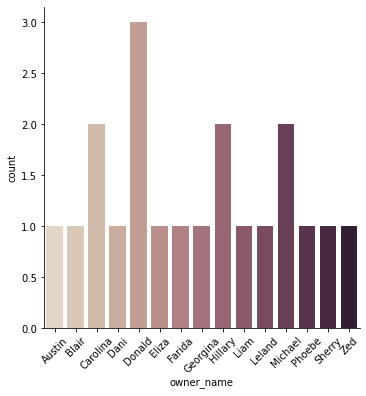

In [67]:
chart_1 = sns.catplot(x="owner_name", kind="count", palette="ch:.25", data=query_2)
chart_1.set_xticklabels(rotation=45)

Showing the different values of homes in different areas, note the outliers.

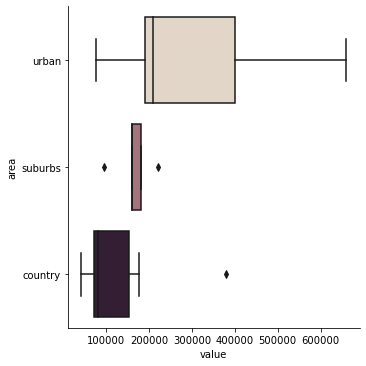

In [57]:
chart_2 = sns.catplot(x="value", y="area", kind="box", palette="ch:.25", data=query_2)

Showing different homes owned by people and their corresponding values and areas.

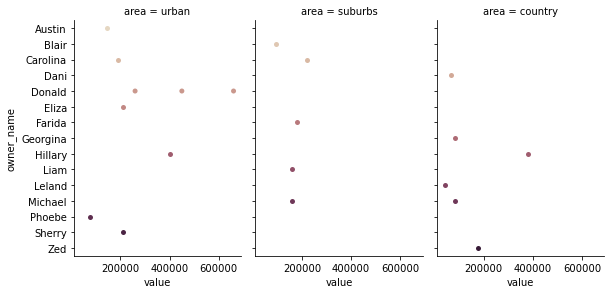

In [69]:
chart_3 = sns.catplot(x="value", y="owner_name", col="area",
                data=query_2, kind="swarm",
                height=4, aspect=.7, palette="ch:.25");

### Construct Level 3

In this section I will construct some data tables using data that is not automatically aligned.

In [96]:
# Loading data
friends= pd.read_excel("friends.xlsx")
friends_1 = pd.read_excel("friends_1.xlsx")

In [97]:
# Look at first file
friends

,name,age,sport,birthday_month,favorite_color
0,Brianna,22,Soccer,November,Blue
1,Barbara,21,Track,September,Purple
2,Courtney,19,Track,June,Red
3,Shannon,19,Softball,June,Pink
4,Cat,19,Track,August,Yellow
5,Sophia,20,Soccer,December,Orange
6,Maddy,19,Softball,September,Orange


In [98]:
# Look at second file
friends_1

,name,age,sport,birthday_month
0,Sean,22,Baseball,August
1,George,21,Baseball,September
2,Ryan,24,Soccer,May
3,Dan,25,Track,April
4,Cameron,19,Basketball,November


As we can see above, the two datasets are not the same. The first dataset has 7 rows and 5 columns, whereas the second dataset has 5 rows and 4 columns.

The key here is to look for similar column names to merge on, even if the data is not aligned. I will do this below.

In [99]:
# First merge
merge_1 = pd.merge(left = friends, right = friends_1, how='outer', on=['name', 'age', 'sport', 'birthday_month'])
merge_1

,name,age,sport,birthday_month,favorite_color
0,Brianna,22,Soccer,November,Blue
1,Barbara,21,Track,September,Purple
2,Courtney,19,Track,June,Red
3,Shannon,19,Softball,June,Pink
4,Cat,19,Track,August,Yellow
5,Sophia,20,Soccer,December,Orange
6,Maddy,19,Softball,September,Orange
7,Sean,22,Baseball,August,NaN
8,George,21,Baseball,September,NaN
9,Ryan,24,Soccer,May,NaN


As we can see, we have some missing NaN values in the additional column that was included in the first dataset **friends**. However, we can fill these missing values using the **mode**, or most common occurence of the other values for **favorite_color**.

In [100]:
friends.favorite_color.mode()

0    Orange
dtype: object

As we can see from the code above, the mode for **favorite_color** in the friends dataset is Orange. Now, we can fill the missing values with these occurences.

In [101]:
for column in ['favorite_color']:
    merge_1[column].fillna(merge_1[column].mode()[0], inplace=True)

In [102]:
merge_1

,name,age,sport,birthday_month,favorite_color
0,Brianna,22,Soccer,November,Blue
1,Barbara,21,Track,September,Purple
2,Courtney,19,Track,June,Red
3,Shannon,19,Softball,June,Pink
4,Cat,19,Track,August,Yellow
5,Sophia,20,Soccer,December,Orange
6,Maddy,19,Softball,September,Orange
7,Sean,22,Baseball,August,Orange
8,George,21,Baseball,September,Orange
9,Ryan,24,Soccer,May,Orange
